# Road Rage: Finding the Ideal Speed Limit

### Assumptions
* Drivers want to go up to 120 km/hr.
* The average car is 5 meters long.
* Drivers want at least a number of meters equal to their speed in meters/second between them and the next car.
* Drivers will accelerate 2 m/s<sup>2</sup> up to their desired speed as long as they have room to do so.
* If another car is too close, drivers will match that car's speed until they have room again.
* If a driver would hit another car by continuing, they stop.
* Drivers will randomly (10% chance each second) slow by 2 m/s.
* This section of road is one lane going one way.
* Assume that drivers enter the road at the speed they left.
* Simulation starts with 30 cars per kilometer, evenly spaced.

## Normal Mode
We have a 1 kilometer section of road being built and do not know what the speed limit should be. This notebook simulates the 1 kilometer of road. Even though this road is not circular, the simulation treats it as such in order to generate a continuous flow of traffic.

In [1]:
from copy import deepcopy
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from traffic_lib import *
%matplotlib inline

`HighwaySim.sim_data` is a list of lists; one list of each car's speed for each of the "ticks"

In [2]:
def highway_trials(num_trials=1000, speed_limit=33):
    """
    Run num_trials of run_sim
    """
    trial_stats = []
    for _ in range(num_trials):
        sim = HighwaySim(speed_limit)
        trial_stats.append(sim.run_sim(60))
    return trial_stats

In [3]:
highway_1000_33_data = highway_trials(1000)

In [4]:
highway_1000_33_mean = np.mean(np.array(highway_1000_33_data))
highway_1000_33_std = np.std(np.array(highway_1000_33_data))
print("1000-Trial Mean: {}".format(highway_1000_33_mean))
print("1000-Trial Standard Deviation: {}".format(highway_1000_33_std))
print("Speed Limit Recommendation: {}".format(int(highway_1000_33_mean + highway_1000_33_std)))

1000-Trial Mean: 15.0807
1000-Trial Standard Deviation: 6.221416751744645
Speed Limit Recommendation: 21


In [5]:
highway_1000_43_data = highway_trials(1000, 43)

In [6]:
highway_1000_43_mean = np.mean(np.array(highway_1000_43_data))
highway_1000_43_std = np.std(np.array(highway_1000_43_data))
print("1000-Trial Mean: {}".format(highway_1000_43_mean))
print("1000-Trial Standard Deviation: {}".format(highway_1000_43_std))

1000-Trial Mean: 14.9093
1000-Trial Standard Deviation: 6.169650193487472


In [7]:
highway_1000_21_data = highway_trials(1000, 21)

In [8]:
highway_1000_21_mean = np.mean(np.array(highway_1000_21_data))
highway_1000_21_std = np.std(np.array(highway_1000_21_data))
print("1000-Trial Mean: {}".format(highway_1000_21_mean))
print("1000-Trial Standard Deviation: {}".format(highway_1000_21_std))

1000-Trial Mean: 20.606
1000-Trial Standard Deviation: 0.3758244270932907


In [9]:
highway_1000_20_data = highway_trials(1000, 20)

In [10]:
highway_1000_20_mean = np.mean(np.array(highway_1000_20_data))
highway_1000_20_std = np.std(np.array(highway_1000_20_data))
print("1000-Trial Mean: {}".format(highway_1000_20_mean))
print("1000-Trial Standard Deviation: {}".format(highway_1000_20_std))

1000-Trial Mean: 19.5985
1000-Trial Standard Deviation: 0.39744038686463573


In [11]:
highway_1000_22_data = highway_trials(1000, 22)

In [12]:
highway_1000_22_mean = np.mean(np.array(highway_1000_22_data))
highway_1000_22_std = np.std(np.array(highway_1000_22_data))
print("1000-Trial Mean: {}".format(highway_1000_22_mean))
print("1000-Trial Standard Deviation: {}".format(highway_1000_22_std))

1000-Trial Mean: 21.56693333333334
1000-Trial Standard Deviation: 0.5945754190082946


In [13]:
sim1 = HighwaySim()
sim1.run_sim(60)
sim2 = HighwaySim(43)
sim2.run_sim(60)
sim3 = HighwaySim(21)
sim3.run_sim(60)
sim4 = HighwaySim(22)
sim4.run_sim(60)

21.800000000000001

Graphs of Single Trial at Noted Speed


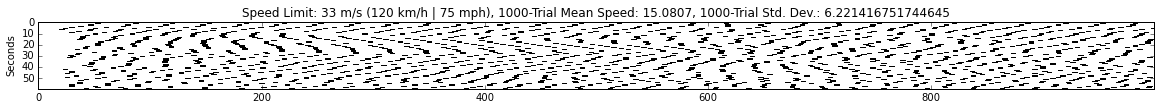

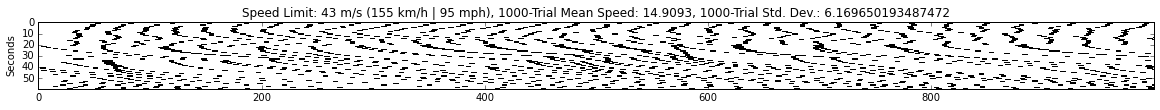

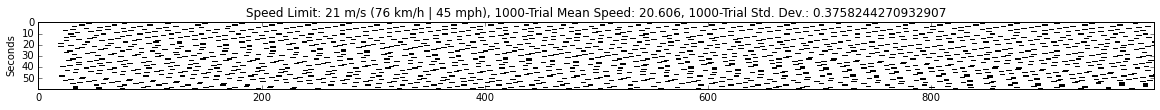

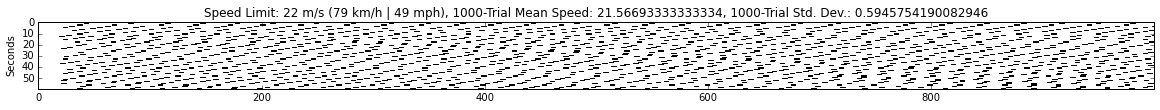

In [14]:
print('Graphs of Single Trial at Noted Speed')
plt.figure(figsize=(20, 20)) # size is in "inches"
plt.imshow(sim1.sim_graph, cmap='gray', interpolation='nearest')
plt.title('Speed Limit: 33 m/s (120 km/h | 75 mph), 1000-Trial Mean Speed: {}, 1000-Trial Std. Dev.: {}'.format(
          highway_1000_33_mean, highway_1000_33_std))
plt.ylabel('Seconds')
plt.show()

plt.figure(figsize=(20, 20)) # size is in "inches"
plt.imshow(sim2.sim_graph, cmap='gray', interpolation='nearest')
plt.title('Speed Limit: 43 m/s (155 km/h | 95 mph)')
plt.title('Speed Limit: 43 m/s (155 km/h | 95 mph), 1000-Trial Mean Speed: {}, 1000-Trial Std. Dev.: {}'.format(
          highway_1000_43_mean, highway_1000_43_std))
plt.ylabel('Seconds')
plt.show()

plt.figure(figsize=(20, 20)) # size is in "inches"
plt.imshow(sim3.sim_graph, cmap='gray', interpolation='nearest')
plt.title('Speed Limit: 21 m/s (76 km/h | 45 mph)')
plt.title('Speed Limit: 21 m/s (76 km/h | 45 mph), 1000-Trial Mean Speed: {}, 1000-Trial Std. Dev.: {}'.format(
          highway_1000_21_mean, highway_1000_21_std))
plt.ylabel('Seconds')
plt.show()

plt.figure(figsize=(20, 20)) # size is in "inches"
plt.imshow(sim4.sim_graph, cmap='gray', interpolation='nearest')
plt.title('Speed Limit: 22 m/s (79 km/h | 49 mph)')
plt.title('Speed Limit: 22 m/s (79 km/h | 49 mph), 1000-Trial Mean Speed: {}, 1000-Trial Std. Dev.: {}'.format(
          highway_1000_22_mean, highway_1000_22_std))
plt.ylabel('Seconds')
plt.show()

### Analysis of Single-Simulation Graphs at Different Speed Limits

In the graph of the speed limit 120 km/h | 75 mph, we see wave trends, indicating collection of traffic. For effect, I have also shown the more extreme case of 155 km/h | 95 mph to show how clumped up the traffic gets with too high of a speed limit. In stark contrast to both of these, the graph showing the ideal 76 km/h speed limit shows no signs of any steeply angled wave trends, indicating the lack of traffic backups. Note that in the 79 km/h | 49 mph graph, there are already traffic waves beginning to form.